In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv(r"E:\data course\6-Python\Week03\Linear Regression\boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


<Axes: >

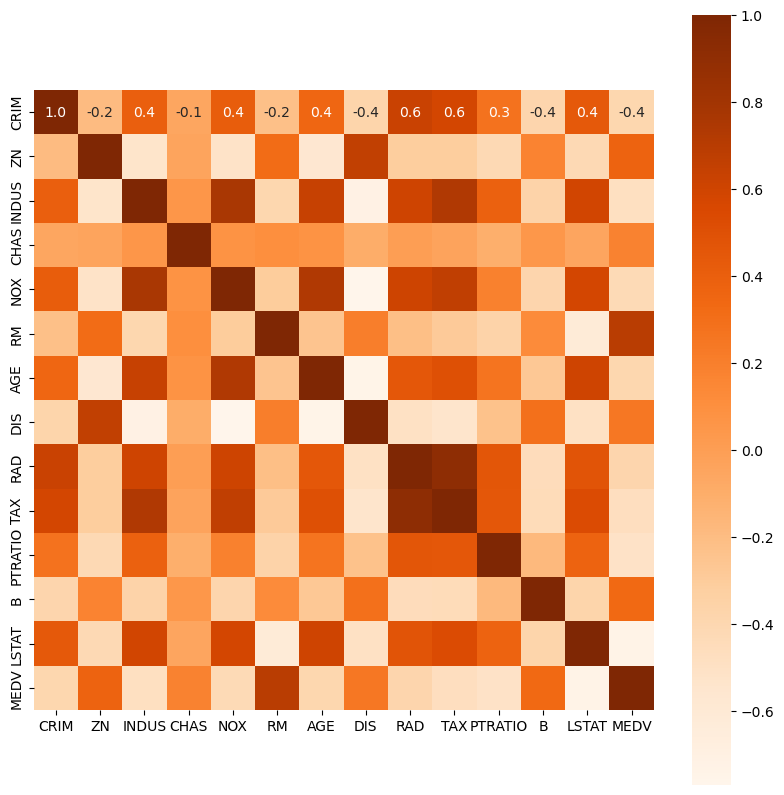

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Oranges')

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [52]:
# simple reg
X = df[['RM']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 15)


In [53]:
# Create a Linear regressor
slr = LinearRegression()

# Train the model using the training sets 
slr.fit(X_train, y_train)

LinearRegression()

In [54]:
slr.intercept_

-41.99889776528124

In [55]:
slr.coef_

array([10.22729713])

In [56]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,slr.coef_]).transpose()
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,RM,10.227297


In [57]:
# Model prediction on train data
y_pred = slr.predict(X_test)

In [58]:
# evaluation
y_pred = slr.predict(X_test)
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.3660053181069769
MAE: 4.002262704073495
MSE: 38.84000417414032
RMSE: 6.232174915239488


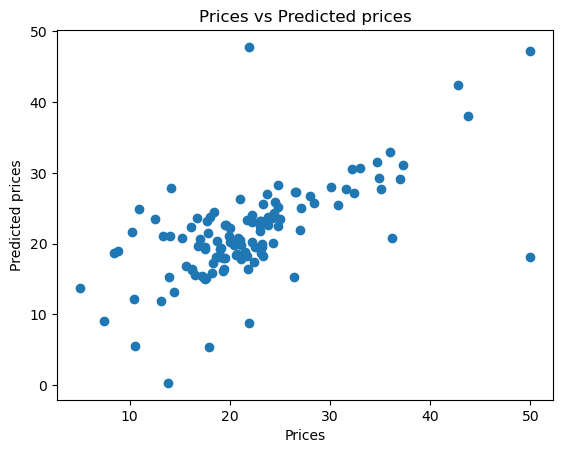

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [37]:
# multiple linear regression
# Spliting target variable and independent variables
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [60]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [61]:
# Create a Linear regressor
mlr = LinearRegression()

# Train the model using the training sets 
mlr.fit(X_train, y_train)

LinearRegression()

In [62]:
mlr.intercept_

-35.50698474415586

In [63]:
mlr.coef_

array([9.15596199])

In [64]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,mlr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,RM,9.155962


In [65]:
# Model prediction on train data
y_pred = mlr.predict(X_test)

In [66]:
# evaluation
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.5549991523363117
MAE: 4.325946961732926
MSE: 41.51291641116949
RMSE: 6.443051793301796


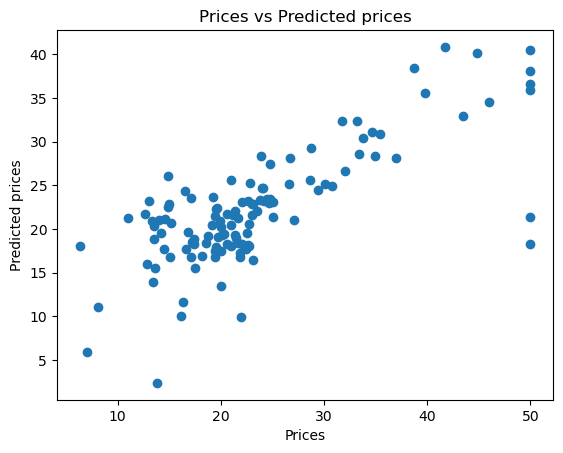

In [67]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [68]:
# polynomial regression

In [69]:
#"Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_quadratic = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
quadratic = LinearRegression()

quadratic.fit(X_train_quadratic, y_train)
     
# predicting on training data-set
y_train_predicted = quadratic.predict(X_train_quadratic)
   
# predicting on test data-set
y_test_predicted = quadratic.predict(poly_features.fit_transform(X_test))

In [70]:
metrics.r2_score(y_train, y_train_predicted)      # overfitting

0.5466918526158503

In [71]:
metrics.r2_score(y_test, y_test_predicted)

0.6088677087477643

In [73]:
df1=pd.read_csv(r"E:\data course\6-Python\Week02\Visualization\tips.csv")
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [83]:
df1.replace({ 'sex': {'Male':0 , 'Female':1} , 'smoker' : {'No': 0 , 'Yes': 1}} ,inplace=True)

In [77]:
times=pd.get_dummies(df1['time'])
times.sample(5)

,Dinner,Lunch
101,True,False
168,True,False
4,True,False
174,True,False
82,False,True


In [78]:
days=pd.get_dummies(df1['day'])
days.sample(5)

,Fri,Sat,Sun,Thur
223,True,False,False,False
93,True,False,False,False
144,False,False,False,True
204,False,False,False,True
125,False,False,False,True


In [79]:
days=pd.get_dummies(df1['day'],dtype=int)
df1 = pd.concat([df1,days],axis=1)

In [80]:
times=pd.get_dummies(df1['time'],dtype=int)
df1 = pd.concat([df1,times],axis=1)

In [84]:
df1

,total_bill,tip,sex,smoker,day,time,size,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,1,0,Sun,Dinner,2,0,0,1,0,1,0
1,10.34,1.66,0,0,Sun,Dinner,3,0,0,1,0,1,0
2,21.01,3.50,0,0,Sun,Dinner,3,0,0,1,0,1,0
3,23.68,3.31,0,0,Sun,Dinner,2,0,0,1,0,1,0
4,24.59,3.61,1,0,Sun,Dinner,4,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,Sat,Dinner,3,0,1,0,0,1,0
240,27.18,2.00,1,1,Sat,Dinner,2,0,1,0,0,1,0
241,22.67,2.00,0,1,Sat,Dinner,2,0,1,0,0,1,0
242,17.82,1.75,0,0,Sat,Dinner,2,0,1,0,0,1,0


In [86]:
df1=df1[['total_bill','tip','sex','smoker','size','Fri','Sat','Sun','Thur','Dinner','Lunch']]
df1

,total_bill,tip,sex,smoker,size,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,1,0,2,0,0,1,0,1,0
1,10.34,1.66,0,0,3,0,0,1,0,1,0
2,21.01,3.50,0,0,3,0,0,1,0,1,0
3,23.68,3.31,0,0,2,0,0,1,0,1,0
4,24.59,3.61,1,0,4,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,3,0,1,0,0,1,0
240,27.18,2.00,1,1,2,0,1,0,0,1,0
241,22.67,2.00,0,1,2,0,1,0,0,1,0
242,17.82,1.75,0,0,2,0,1,0,0,1,0


<Axes: >

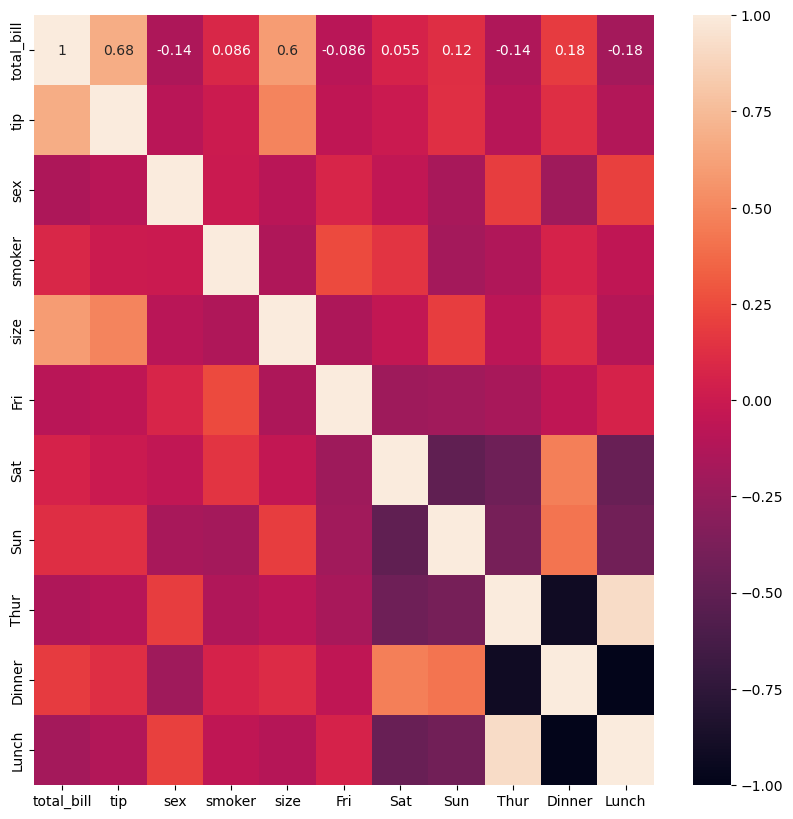

In [90]:
my_correlation = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(my_correlation,annot=True)

In [92]:
X = df1[['total_bill','size']]
Y = df1['tip']

In [93]:
X_train, X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [94]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [95]:
predictions=regressor.predict(X_test)

In [96]:
predictions

array([2.89795206, 1.84870778, 3.83076077, 3.95799945, 2.25036419,
       2.71469039, 3.71645756, 2.20098799, 2.41938272, 2.47635526,
       2.75267209, 2.03861625, 2.02722174, 2.39089645, 1.73031069,
       3.02774366, 3.03439046, 3.06507152, 2.5779563 , 5.65263682,
       3.46423743, 3.21860167, 2.37475423, 1.92277208, 3.24234023,
       2.12597414, 1.99113913, 3.41640218, 3.06542965, 6.55725496,
       4.87270443, 1.75090492, 3.19076924, 2.94258055, 2.86917009,
       3.78613228, 2.15825858, 5.59311136, 2.26555687, 3.16857163,
       2.01392815, 2.39469462, 3.29011305, 2.23867397, 1.99778593,
       1.06563105, 2.02152448, 3.03249137, 1.73381315, 2.27695137,
       3.32049841, 3.60631065, 4.51063309, 2.53332781, 2.86661717,
       2.25321281, 1.70437734, 2.7080436 , 2.89670682, 2.74762867,
       4.57585581])

In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.6733964800665359
Mean Squared Error: 0.7743095126500432
Root Mean Squared Error: 0.8799485852310027
